# 標本平均の分布

In [6]:
import numpy as np
# from scipy.stats import norm
import matplotlib.pyplot as plt

In [7]:
# plt.rcParams['font.size'] = 18
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.default'] = 'it'
plt.rcParams['figure.subplot.bottom']=0.2
plt.rcParams['figure.subplot.left']=0.2

## [0,1)の一様乱数から平均を計算
母集団の平均は1/2、分散は1/12

In [8]:
def evalSampleMean(n: int) -> float:
    """
    大きさnの標本に対して、平均を返す
    """
    x = 0
    for i in range(n):
        x += np.random.rand()#[0,1)の乱数
    return x / n

In [9]:
def norm(x: float, mu: float, sigma: float) -> float:
    """
    正規分布の確率密度関数
    """
    return 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-(x - mu)**2 / (2 * sigma**2))

def norm_pdf(x: np.ndarray, mu: float, sigma: float) -> np.ndarray:
    """
    正規分布の確率密度関数
    """
    return 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-(x - mu)**2 / (2 * sigma**2))

In [ ]:
def createSample(sample_size:int, num_samples:int) -> np.ndarray:
    """
    標本を生成する
    """
    sample_means = np.zeros(num_samples)
    for i in range(num_samples):
        sample_means[i] = evalSampleMean(sample_size)
    return sample_means

In [ ]:
def normal_distribution(mu: float, sigma: float, numBin:int) -> tuple[list[float], list[float]]:
    """
    正規分布の確率密度関数
    """
    x:list[float] = np.linspace(- 5*sigma + mu, 5*sigma + mu, 10*numBin)
    y:list[float] = norm_pdf(x, mu, sigma)
    return x, y

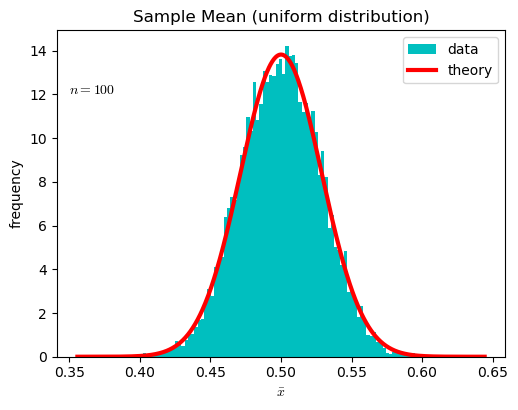

In [11]:
#標本平均を作る
sample_size = 100 #標本サイズ
num_samples = 10000 #標本数
sample_means = createSample(sample_size, num_samples)

#正規分布の曲線
numBin = 100
mu = .5
sigma = 1/np.sqrt(12)/np.sqrt(sample_size)
x,y = normal_distribution(mu, sigma, numBin)

#作図
fig, ax =plt.subplots(facecolor='white')
ax.set_title('Sample Mean (uniform distribution)')
ax.text(.35,12,f'$n = {sample_size}$')
ax.set_xlabel('$\\bar{x}$')
ax.set_ylabel('frequency')
#ヒストグラムを表示
ax.hist(sample_means, bins = numBin, density = True, color = 'c', label = "data")
#正規分布を表示
ax.plot(x, y, color = 'r', linewidth = 3, label = "theory")
ax.legend(loc = 'upper right')
fig.savefig('sampleMean.pdf')
plt.show()